In [1]:
import os
import librosa
import random
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import python_speech_features
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [2]:
dataset_path = './dataset'
targets = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]
print(targets)

['on', 'two', 'one', 'three', 'off']


In [3]:
num_samples = 0
for target in targets:
    print(len(os.listdir(os.path.join(dataset_path, target))))
    num_samples += len(os.listdir(os.path.join(dataset_path, target)))
print('Total samples:', num_samples)

3845
3880
3890
3727
3745
Total samples: 19087


In [4]:
audio_files = []
y = []
for index, target in enumerate(targets):
    print(os.path.join(dataset_path, target))
    audio_files.append(os.listdir(os.path.join(dataset_path, target)))
    y.append(np.ones(len(audio_files[index])) * index)
audio_files = [item for sublist in audio_files for item in sublist]
y = [item for sublist in y for item in sublist]
print(len(audio_files))
print(len(y))

./dataset/on
./dataset/two
./dataset/one
./dataset/three
./dataset/off
19087
19087


In [5]:
audio_files_train, audio_files_val_test, y_orig_train, y_orig_val_train = train_test_split(audio_files, y, test_size = 0.2)
audio_files_val, audio_files_test, y_orig_val, y_orig_test = train_test_split(audio_files_val_test, y_orig_val_train, test_size = 0.5)
print(len(audio_files_train))
print(len(audio_files_val))
print(len(audio_files_test))
print(len(y_orig_train))
print(len(y_orig_val))
val_set_size = len(y_orig_val)
print(len(y_orig_test))
test_set_size = len(y_orig_test)

15269
1909
1909
15269
1909
1909


In [6]:
def calc_mfcc(path):
    signal, fs = librosa.load(path, sr=16000)
    mfccs = python_speech_features.base.mfcc(signal, 
                                             samplerate=fs,
                                             winlen = 0.025,
                                             winstep = 0.01,
                                             numcep = 20,
                                             nfilt = 20,
                                             nfft = 2048,
                                             preemph = 0,
                                             ceplifter = 0,
                                             appendEnergy = False,
                                             winfunc = np.hanning)
    return mfccs.transpose()

In [7]:
def extract_features(in_audio, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, audio in enumerate(in_audio):
    
        path = os.path.join(dataset_path, targets[int(in_y[index])], audio)
        
        if not path.endswith('.wav'):
            continue

        mfccs = calc_mfcc(path)

        if mfccs.shape[1] == 99:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [8]:
x_train, y_train, prob = extract_features(audio_files_train, y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(audio_files_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(audio_files_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 42 (20, 92)
Dropped: 54 (20, 93)
Dropped: 103 (20, 50)
Dropped: 112 (20, 83)
Dropped: 126 (20, 83)
Dropped: 128 (20, 93)
Dropped: 129 (20, 97)
Dropped: 131 (20, 72)
Dropped: 138 (20, 67)
Dropped: 143 (20, 78)
Dropped: 168 (20, 81)
Dropped: 171 (20, 97)
Dropped: 176 (20, 74)
Dropped: 191 (20, 55)
Dropped: 198 (20, 74)
Dropped: 231 (20, 67)
Dropped: 240 (20, 84)
Dropped: 243 (20, 72)
Dropped: 259 (20, 97)
Dropped: 260 (20, 38)
Dropped: 265 (20, 84)
Dropped: 302 (20, 78)
Dropped: 313 (20, 89)
Dropped: 322 (20, 89)
Dropped: 324 (20, 97)
Dropped: 327 (20, 87)
Dropped: 343 (20, 80)
Dropped: 348 (20, 74)
Dropped: 360 (20, 83)
Dropped: 369 (20, 83)
Dropped: 370 (20, 87)
Dropped: 396 (20, 84)
Dropped: 407 (20, 84)
Dropped: 409 (20, 93)
Dropped: 420 (20, 87)
Dropped: 429 (20, 97)
Dropped: 443 (20, 93)
Dropped: 450 (20, 84)
Dropped: 460 (20, 89)
Dropped: 479 (20, 75)
Dropped: 483 (20, 97)
Dropped: 484 (20, 78)
Dropped: 490 (20, 78)
Dropped: 491 (20, 97)
Dropped: 493 (20, 93)
Dropped: 494

Dropped: 3910 (20, 93)
Dropped: 3911 (20, 89)
Dropped: 3917 (20, 78)
Dropped: 3918 (20, 97)
Dropped: 3927 (20, 69)
Dropped: 3940 (20, 76)
Dropped: 3944 (20, 59)
Dropped: 3977 (20, 87)
Dropped: 3981 (20, 89)
Dropped: 3988 (20, 72)
Dropped: 4012 (20, 90)
Dropped: 4024 (20, 92)
Dropped: 4041 (20, 76)
Dropped: 4048 (20, 63)
Dropped: 4054 (20, 72)
Dropped: 4060 (20, 74)
Dropped: 4063 (20, 69)
Dropped: 4077 (20, 67)
Dropped: 4097 (20, 97)
Dropped: 4110 (20, 87)
Dropped: 4111 (20, 59)
Dropped: 4117 (20, 93)
Dropped: 4165 (20, 89)
Dropped: 4181 (20, 84)
Dropped: 4189 (20, 93)
Dropped: 4193 (20, 78)
Dropped: 4232 (20, 97)
Dropped: 4245 (20, 93)
Dropped: 4249 (20, 80)
Dropped: 4253 (20, 89)
Dropped: 4256 (20, 42)
Dropped: 4265 (20, 82)
Dropped: 4270 (20, 89)
Dropped: 4272 (20, 73)
Dropped: 4294 (20, 80)
Dropped: 4322 (20, 89)
Dropped: 4328 (20, 72)
Dropped: 4332 (20, 97)
Dropped: 4335 (20, 84)
Dropped: 4340 (20, 84)
Dropped: 4344 (20, 93)
Dropped: 4370 (20, 72)
Dropped: 4403 (20, 84)
Dropped: 44

Dropped: 7944 (20, 97)
Dropped: 7952 (20, 78)
Dropped: 7965 (20, 89)
Dropped: 7967 (20, 67)
Dropped: 7968 (20, 73)
Dropped: 7969 (20, 74)
Dropped: 7978 (20, 84)
Dropped: 7982 (20, 87)
Dropped: 8001 (20, 63)
Dropped: 8005 (20, 63)
Dropped: 8023 (20, 72)
Dropped: 8044 (20, 59)
Dropped: 8103 (20, 69)
Dropped: 8115 (20, 97)
Dropped: 8147 (20, 73)
Dropped: 8159 (20, 97)
Dropped: 8164 (20, 87)
Dropped: 8175 (20, 87)
Dropped: 8177 (20, 97)
Dropped: 8185 (20, 89)
Dropped: 8189 (20, 55)
Dropped: 8211 (20, 54)
Dropped: 8226 (20, 97)
Dropped: 8232 (20, 59)
Dropped: 8236 (20, 64)
Dropped: 8241 (20, 59)
Dropped: 8243 (20, 93)
Dropped: 8251 (20, 76)
Dropped: 8299 (20, 78)
Dropped: 8312 (20, 89)
Dropped: 8327 (20, 92)
Dropped: 8328 (20, 93)
Dropped: 8373 (20, 67)
Dropped: 8375 (20, 72)
Dropped: 8376 (20, 64)
Dropped: 8382 (20, 84)
Dropped: 8392 (20, 84)
Dropped: 8403 (20, 93)
Dropped: 8420 (20, 97)
Dropped: 8424 (20, 93)
Dropped: 8429 (20, 97)
Dropped: 8432 (20, 69)
Dropped: 8435 (20, 54)
Dropped: 84

Dropped: 11559 (20, 97)
Dropped: 11569 (20, 97)
Dropped: 11572 (20, 55)
Dropped: 11574 (20, 76)
Dropped: 11584 (20, 63)
Dropped: 11601 (20, 69)
Dropped: 11624 (20, 87)
Dropped: 11634 (20, 97)
Dropped: 11637 (20, 69)
Dropped: 11656 (20, 78)
Dropped: 11668 (20, 69)
Dropped: 11674 (20, 83)
Dropped: 11686 (20, 72)
Dropped: 11689 (20, 80)
Dropped: 11690 (20, 55)
Dropped: 11691 (20, 74)
Dropped: 11711 (20, 74)
Dropped: 11716 (20, 97)
Dropped: 11738 (20, 93)
Dropped: 11745 (20, 80)
Dropped: 11748 (20, 87)
Dropped: 11770 (20, 73)
Dropped: 11785 (20, 80)
Dropped: 11795 (20, 83)
Dropped: 11800 (20, 72)
Dropped: 11806 (20, 84)
Dropped: 11808 (20, 87)
Dropped: 11809 (20, 83)
Dropped: 11821 (20, 97)
Dropped: 11822 (20, 87)
Dropped: 11843 (20, 63)
Dropped: 11844 (20, 89)
Dropped: 11861 (20, 75)
Dropped: 11882 (20, 55)
Dropped: 11889 (20, 64)
Dropped: 11895 (20, 74)
Dropped: 11904 (20, 84)
Dropped: 11918 (20, 97)
Dropped: 11926 (20, 89)
Dropped: 11936 (20, 83)
Dropped: 11952 (20, 76)
Dropped: 12016 (

Dropped: 15245 (20, 89)
Dropped: 15251 (20, 87)
Dropped: 15256 (20, 32)
Removed percentage: 0.09299888663304735
Dropped: 4 (20, 69)
Dropped: 5 (20, 67)
Dropped: 17 (20, 63)
Dropped: 19 (20, 92)
Dropped: 26 (20, 89)
Dropped: 35 (20, 50)
Dropped: 37 (20, 89)
Dropped: 55 (20, 97)
Dropped: 62 (20, 78)
Dropped: 72 (20, 78)
Dropped: 97 (20, 80)
Dropped: 130 (20, 80)
Dropped: 131 (20, 94)
Dropped: 143 (20, 76)
Dropped: 153 (20, 64)
Dropped: 158 (20, 87)
Dropped: 163 (20, 59)
Dropped: 164 (20, 46)
Dropped: 204 (20, 97)
Dropped: 222 (20, 74)
Dropped: 234 (20, 59)
Dropped: 252 (20, 89)
Dropped: 263 (20, 76)
Dropped: 267 (20, 97)
Dropped: 293 (20, 84)
Dropped: 298 (20, 69)
Dropped: 305 (20, 74)
Dropped: 320 (20, 69)
Dropped: 367 (20, 93)
Dropped: 376 (20, 72)
Dropped: 378 (20, 59)
Dropped: 382 (20, 74)
Dropped: 394 (20, 67)
Dropped: 402 (20, 84)
Dropped: 418 (20, 69)
Dropped: 421 (20, 83)
Dropped: 429 (20, 92)
Dropped: 438 (20, 93)
Dropped: 443 (20, 46)
Dropped: 447 (20, 93)
Dropped: 458 (20, 75)

In [9]:
target_npz_name = "targets.npz"
np.savez(target_npz_name, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)
feature_sets = np.load(target_npz_name)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

# Model Training

In [3]:
target_npz_name = "targets.npz"
feature_sets = np.load(target_npz_name)
feature_sets.files
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(13849, 20, 99)
(1721, 20, 99)
(1748, 20, 99)


In [4]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
sample_shape = x_test.shape[1:]
print(x_train.shape)
print(sample_shape)

(13849, 20, 99, 1)
(20, 99, 1)


In [21]:
keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(targets), activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 98, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 49, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 48, 32)         4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 24, 32)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 24, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 23, 64)         8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 11, 64)         0

In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [24]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/100
139/139 [==============================] - 12s 82ms/step - loss: 2.2348 - accuracy: 0.2117 - val_loss: 1.4758 - val_accuracy: 0.4178
Epoch 2/100
139/139 [==============================] - 12s 87ms/step - loss: 1.3686 - accuracy: 0.3892 - val_loss: 0.8687 - val_accuracy: 0.7159
Epoch 3/100
139/139 [==============================] - 14s 101ms/step - loss: 0.9922 - accuracy: 0.5850 - val_loss: 0.6099 - val_accuracy: 0.7931
Epoch 4/100
139/139 [==============================] - 15s 104ms/step - loss: 0.7852 - accuracy: 0.6945 - val_loss: 0.4672 - val_accuracy: 0.8524
Epoch 5/100
139/139 [==============================] - 13s 96ms/step - loss: 0.6739 - accuracy: 0.7436 - val_loss: 0.3713 - val_accuracy: 0.8751
Epoch 6/100
139/139 [==============================] - 14s 101ms/step - loss: 0.5789 - accuracy: 0.7903 - val_loss: 0.3007 - val_accuracy: 0.8937
Epoch 7/100
139/139 [==============================] - 17s 120ms/step - loss: 0.5003 - accuracy: 0.8159 - val_loss: 0.2874 - va

Epoch 57/100
139/139 [==============================] - 10s 73ms/step - loss: 0.1338 - accuracy: 0.9515 - val_loss: 0.1075 - val_accuracy: 0.9617
Epoch 58/100
139/139 [==============================] - 13s 93ms/step - loss: 0.1348 - accuracy: 0.9525 - val_loss: 0.1000 - val_accuracy: 0.9646
Epoch 59/100
139/139 [==============================] - 11s 80ms/step - loss: 0.1308 - accuracy: 0.9512 - val_loss: 0.1076 - val_accuracy: 0.9640
Epoch 60/100
139/139 [==============================] - 15s 106ms/step - loss: 0.1449 - accuracy: 0.9505 - val_loss: 0.1110 - val_accuracy: 0.9640
Epoch 61/100
139/139 [==============================] - 11s 81ms/step - loss: 0.1149 - accuracy: 0.9600 - val_loss: 0.1125 - val_accuracy: 0.9651
Epoch 62/100
139/139 [==============================] - 11s 79ms/step - loss: 0.1250 - accuracy: 0.9549 - val_loss: 0.1052 - val_accuracy: 0.9617
Epoch 63/100
139/139 [==============================] - 14s 102ms/step - loss: 0.1186 - accuracy: 0.9562 - val_loss: 0.0995

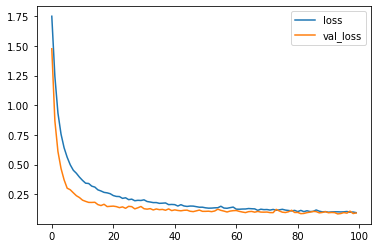

In [25]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [26]:
models.save_model(model, "cmd_recog_model.h5")

# Model Testing

In [5]:
model = keras.models.load_model('cmd_recog_model.h5')

In [6]:
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 3.0  Prediction: [[3.5213268e-13 4.1076301e-10 2.1772363e-13 1.0000000e+00 3.8205446e-23]]
Answer: 1.0  Prediction: [[5.9147165e-10 9.9999988e-01 1.9732356e-10 6.5793600e-08 1.0611068e-08]]
Answer: 1.0  Prediction: [[6.0834351e-13 9.9999964e-01 4.1087314e-11 4.1357436e-07 1.6554660e-13]]
Answer: 0.0  Prediction: [[9.9856323e-01 8.0705304e-11 3.2419248e-07 7.2405921e-14 1.4364261e-03]]
Answer: 2.0  Prediction: [[8.0466198e-06 3.9806075e-16 9.9999189e-01 4.5390351e-14 5.2535533e-15]]
Answer: 4.0  Prediction: [[2.5537136e-07 9.0511802e-09 5.1041937e-10 2.7901592e-10 9.9999976e-01]]
Answer: 3.0  Prediction: [[0.16947785 0.06432171 0.183809   0.07636041 0.50603104]]
Answer: 1.0  Prediction: [[3.4620825e-04 9.7388679e-01 5.2895996e-04 2.4528252e-02 7.0977327e-04]]
Answer: 4.0  Prediction: [[1.8490973e-03 4.7588575e-08 4.5090624e-07 1.6503573e-09 9.9815041e-01]]
Answer: 0.0  Prediction: [[9.84610081e-01 1.59877636e-05 1.51816355e-02 5.14057952e-08
  1.92278225e-04]]


In [7]:
model.evaluate(x=x_test, y=y_test)

55/55 [==============================] - 1s 6ms/step - loss: 0.1276 - accuracy: 0.9542


[0.12759166955947876, 0.9542334079742432]

In [8]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 95%


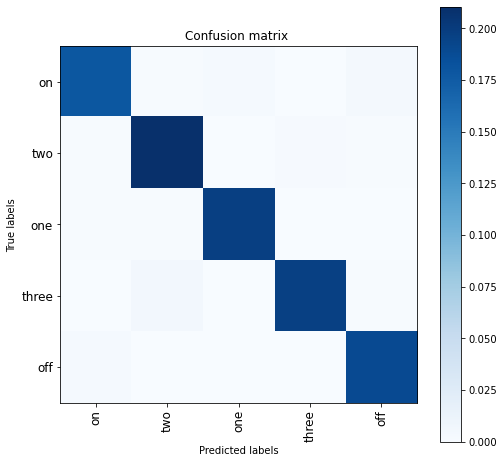

In [11]:
from sklearn.metrics import confusion_matrix
targets = ['on', 'two', 'one', 'three', 'off']
y = np.argmax(model.predict(x_val), axis=1)
cm = confusion_matrix(y_val, y,  normalize="all")
%matplotlib inline
plt.close()
plt.figure(figsize = (8,8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(0, 5, 1), targets, rotation=90)
plt.yticks(np.arange(0, 5, 1), targets)
plt.tick_params(labelsize=12)
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()